In [44]:
import numpy as np
import pandas as pd
import seaborn as sns

In [45]:
df_house = pd.read_csv("data_external/United States/1976-2020-house.csv", encoding="latin-1")
df_senate = pd.read_csv("data_external/United States/1976-2020-senate.csv", encoding="latin-1")
df_president = pd.read_csv("data_external/United States/1976-2020-president.csv", encoding="latin-1")
df_senate = df_senate.rename(columns={"party_detailed": "party"})
df_president = df_president.rename(columns={"party_detailed": "party"})
df_house.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,fusion_ticket
0,1976,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,False,BILL DAVENPORT,DEMOCRAT,False,TOTAL,58906,157170,False,20220331,False
1,1976,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,False,JACK EDWARDS,REPUBLICAN,False,TOTAL,98257,157170,False,20220331,False
2,1976,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,False,False,WRITEIN,NaN,True,TOTAL,7,157170,False,20220331,False
3,1976,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,False,False,J CAROLE KEAHEY,DEMOCRAT,False,TOTAL,66288,156362,False,20220331,False
4,1976,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,False,False,"WILLIAM L ""BILL"" DICKINSON",REPUBLICAN,False,TOTAL,90069,156362,False,20220331,False


In [47]:
def bake_data(df, aggregation = "state"):
    tt = df.groupby(["year", aggregation, "party"]).agg({"candidatevotes": "sum"})
    tt["rate"] = tt.groupby(level=[0, 1], group_keys=False).apply(lambda x: x/x.sum())
    tt = tt.reset_index()

    output = []
    for year, tmp in tt.groupby("year"):
        value = 0
        for party, sbtmp in tmp.groupby("party"):
            if ~np.isnan(sbtmp.rate.std()):
                value += sbtmp.rate.std()

        if value > 0 and year in list(range(1976, 2021, 4)):
            output.append({
                "year": year,
                "value": value
            })

    return pd.DataFrame(output)


In [51]:
data_house = bake_data(df_house, "district")
data_house["election"] = "House (district)"
data_senate = bake_data(df_senate, "state")
data_senate["election"] = "Senate (state)"

data_president = bake_data(df_president, "state")
data_president["election"] = "President (state)"


In [52]:
data = pd.concat([data_house, data_senate, data_president])

<AxesSubplot: xlabel='year', ylabel='value'>

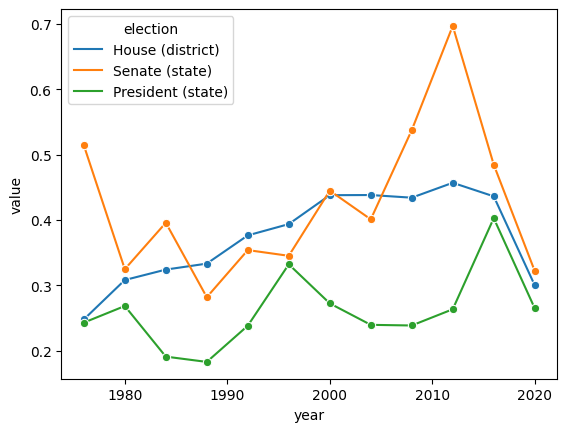

In [55]:
sns.lineplot(x="year", y="value", marker="o", hue="election", data=data)